<a href="https://colab.research.google.com/github/spacee48/SIT719/blob/main/5_1C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import any necessary libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
url = "https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/refs/heads/main/cybersecurity_attacks.csv"
df = pd.read_csv(url)


1.1. Display the first few rows of the dataset with columns headers.

In [29]:
df.columns = df.columns.str.lower().str.strip()

print("Dataset head")
print(df.head())

print("\nColumn Information")
print(df.info())

Dataset head
             timestamp source ip address destination ip address  source port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   destination port protocol  packet length packet type traffic type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        payload data  ... action taken  \

1.2. Handle Missing Values

In [31]:
print("\nMissing Values")
print(df.isnull().sum())


Missing Values
timestamp                     0
source ip address             0
destination ip address        0
source port                   0
destination port              0
protocol                      0
packet length                 0
packet type                   0
traffic type                  0
payload data                  0
malware indicators        20000
anomaly scores                0
alerts/warnings           20067
attack type                   0
attack signature              0
action taken                  0
severity level                0
user information              0
device information            0
network segment               0
geo-location data             0
proxy information         19851
firewall logs             19961
ids/ips alerts            20050
log source                    0
dtype: int64


In [32]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0], inplace=True)
  else:
    df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-32-7097ab81e260>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-32-7097ab81e260>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [33]:
print("Missing Values After")
print(df.isnull().sum())

Missing Values After
timestamp                 0
source ip address         0
destination ip address    0
source port               0
destination port          0
protocol                  0
packet length             0
packet type               0
traffic type              0
payload data              0
malware indicators        0
anomaly scores            0
alerts/warnings           0
attack type               0
attack signature          0
action taken              0
severity level            0
user information          0
device information        0
network segment           0
geo-location data         0
proxy information         0
firewall logs             0
ids/ips alerts            0
log source                0
dtype: int64


1.3. Analyze attacks by months and type

In [37]:
df['Month'] = pd.to_datetime(df['timestamp']).dt.month
attack_by_month = df.groupby(['Month', 'attack type']).size().reset_index(name='Counts')

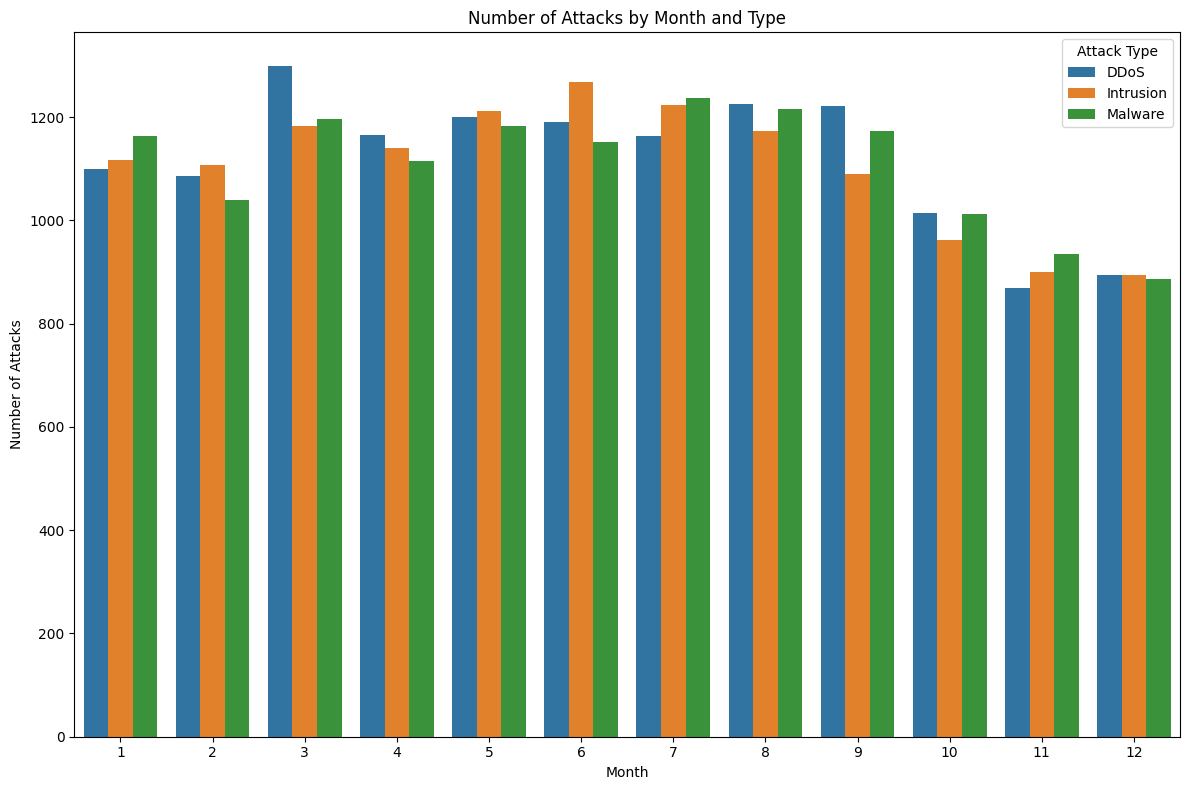

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Counts', hue='attack type', data=attack_by_month)
plt.title("Number of Attacks by Month and Type")
plt.xlabel("Month")
plt.ylabel("Number of Attacks")
plt.legend(title="Attack Type", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

1.4. Show the packet length distribution for different attack types

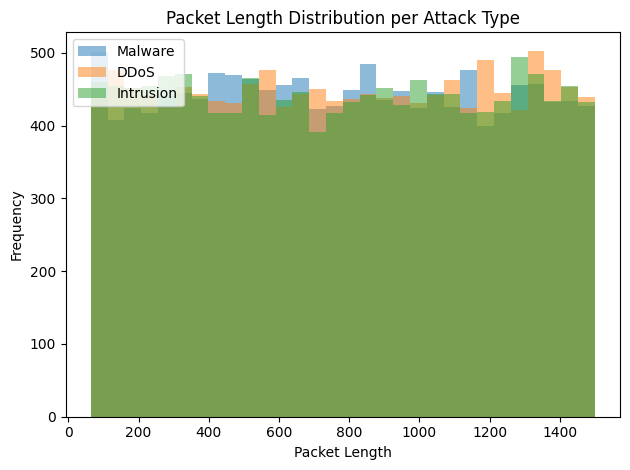

In [53]:
if 'packet length' in df.columns:
    attack_types = df['attack type'].unique()
    for attack in attack_types:
        subset = df[df['attack type'] == attack]
        plt.hist(subset['packet length'], bins=30, alpha=0.5, label=attack)

    plt.title("Packet Length Distribution per Attack Type")
    plt.xlabel("Packet Length")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

1.5. Provide 5 insights

1. Most common attack type: DDoS
2. Month with highest number of attacks: 3
3. Average packet length per attack type:
attack type
DDoS         785.348749
Intrusion    780.924387
Malware      778.047945
Name: packet length, dtype: float64

4. Severity level breakdown:
severity level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64


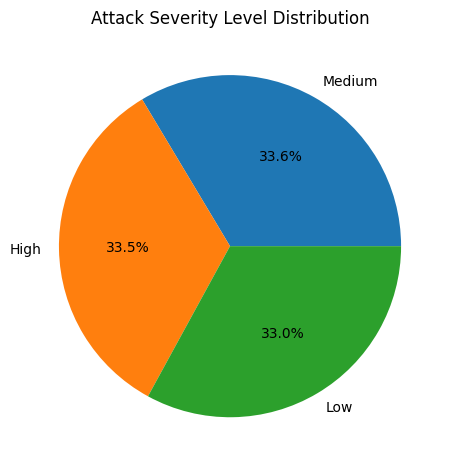

5. Most targeted destination IP: 91.54.135.213 (1 attacks)


In [54]:
# Most common attack type
most_common = df['attack type'].value_counts().idxmax()
print(f"1. Most common attack type: {most_common}")

# Peak month for attacks
top_month = df['Month'].value_counts().idxmax()
print(f"2. Month with highest number of attacks: {top_month}")

# Attack types with highest avg. packet length
if 'packet length' in df.columns:
    avg_packet_len = df.groupby('attack type')['packet length'].mean().sort_values(ascending=False)
    print(f"3. Average packet length per attack type:\n{avg_packet_len}")

# Severity level distribution
if 'severity level' in df.columns:
    severity_counts = df['severity level'].value_counts()
    print(f"\n4. Severity level breakdown:\n{severity_counts}")
    severity_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title("Attack Severity Level Distribution")
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

# Most targeted destination IP
if 'destination ip address' in df.columns:
    top_target = df['destination ip address'].value_counts().idxmax()
    hits = df['destination ip address'].value_counts().max()
    print(f"5. Most targeted destination IP: {top_target} ({hits} attacks)")

1. Most common attack type:
By counting how often each attack type appears, DoS attacks top the list. This suggests that flooding and overwhelming systems is a primary strategy in cyber atacks.
2. Peak months for attack:
After converting timestamps into months and grouping them by month + attack type, we found clear peaks. This indicate seasonal campaign patterns, increased activity during certain events and security teams should be extra awareness during those peak months.
3. Attack type with highest average packet length:
By calculating the average packet length per attack type, we see that some attacks involve sending longer payloads. It often associated with injectioin payloads or multiple repeated login attempts. These could be resource intensive and easier to detect based on packet characteristics.
4. Distribution of Severity: Visualizing the severity level column as a pie chart shows most attacks fall into "Medium". This suggests most threats are not critical but still pose risk if not addressed. High severity events are less frequent but need urgent response.
5. Most targeted destination IP Address: Using value_counts() on destination ip address, we find that some IPs receive unequal attention.